# Fundamentals of Data Analysis Project
## Eimear Butler, November 2018, Semester 2

### Problem statement

The box plot is common in data analysis for investigating individual numerical variables.

In this project, you will investigate and explain box plots and their uses. The boxplot function from the Python package matplotlib.pyplot can be used to create box plots.

In your notebook, you should:
- Summarise the history of the box plot and situations in which it used.
- Demonstrate the use of the box plot using data of your choosing.
- Explain any relevant terminology such as the terms quartile and percentile.
- Compare the box plot to alternatives.



NOTE: The order of the assigned tasks have been rearranged to help the flow of the answer: 

## 1. Explain any relevant terminology such as the terms quartile and percentile

- **BOXPLOT**: dictionary.com defines it as "a graphic representation of a distribution by a rectangle, the ends of which mark the maximum and minimum values, and in which the median and first and third quartiles are marked by lines parallel to the ends." 


- **MINIMUM**: the lowest data value


- **MAXIMUM**: the highest data value


- **MEDIAN<sup>1</sup>**: the "middle" data point based on the number of data points above it and below it e.g. the median of the following data set is 3 as it is the middle value whent he list is arranged in increasing order  [1,2,3,6,6] NOTE: Should the median be between 2 numbers e.g. [1, 2, 2, 3, 6, 6], the average of 2 and 3 is therefore the median i.e. 2.5


- **1st QUARTILE<sup>1</sup> (Q1)**: is the median of the data values between the lowest data value and the median (usually not including the median itself) 


- **3rd QUARTILE<sup>1</sup> (Q3)**: is the median of the data values between the highest data value and the median (usually not including the median itself)


- **INTERQUARTILE RANGE<sup>3</sup>**: the range of values between the 1st Quartile and the 3rd Quartile. The length of the box therefore represents the interquartile range.


- **OUTLIERS<sup>3</sup>**: A value that is at the extreme end of a data set, which is affecting the overall dataset as it is either very small or large. In general, any data not included between the whiskers or on the box, is plotted as an outlier with an asterix symbol. 


- **FIVE-NUMBER SUMMARY**<sup>4</sup>: a summary term for the minimum, maximum, median, Q1 and Q3. 

The terms are best displayed visually below<sup>2</sup>

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)



## 2. Summarise the history of the box plot and situations in which it used

The box plot is a useful method of representing data where you wish to visualise the spread of data within a population. A standard boxplot also highlights the median of the data as well as the upper and lower quartiles <sup>1</sup>. The box part of the plot captures the data points between Q1 and Q3 i.e. the middle 50% of the data values. While the "whiskers" at either end aim to show the range of the lowest and highest quarters of data values. This is why the boxplot is also commonly known as the Box and Whisker Plot. The finished product allows the user to see where the bulk of the data is and how wide a range it actually extends to. 

The "boxplot" title is credited to John Tukey who popularised it in the 1970's and they are now considered a "standard statistical graph" across numerous applications<sup>5</sup>. On their own they have some functionality but really excel when comparing arross multiple data groups. 

More recently, the boxplot has been adapted and added to, forming new interpretations of Tukey's original plot. Two examples are the notched, variable width graphs. The variable width boxblot aims to adapt the width of the boxplot to the proportion of the population while the notched plot aims to integrate the confidence levels of the median into the plot. 

The use of box plots for normally distributed data is also useful where the quartiles and their known values can be aligned to the bell shaped curve. See below<sup>7</sup> the parallel of the boxplots "middle 50%" interquartile range with the normal distribution standard deviation and %population values. 

<img src='https://www.researchgate.net/profile/Luisnando_Ochoa/publication/283569547/figure/fig5/AS:391452027834382@1470340844812/Box-plot-vs-normal-PDF-By-examining-the-box-plots-key-differences-and-equivalencies.png' width="600" height="350">






## 3. Demonstrate the use of the box plot using data of your choosing

The following data set comes from UNICEF where they make a number of data sets freely available to the public on their website. This data is a set with 17,727 rows where the columns have been reduced to simplify the data and to focus on certain atributes. 

The data used relates to the immunisation coverage for countries from the late 1970's up to 2016. 

*NOTE: not all countries have data for every year.*  

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Source: https://data.unicef.org/resources/dataset/immunization/
df = pd.read_csv("https://raw.githubusercontent.com/eimearbutler7/FundamentalsDA_Project/master/immunization_coverage_survey_data-2.csv") #import the data into a pandas datdframe
df.describe(exclude=[np.object]) #describe the dataset in a summary table #source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

,cohortYear,coverage
count,26435.000000,26423.000000
mean,2003.938226,61.357643
std,8.791207,28.950799
min,1977.000000,0.000000
25%,1997.000000,37.500000
50%,2006.000000,67.900000
75%,2011.000000,87.100000
max,2016.000000,100.000000


This is a big data set and in order to establish criteria to pull data to use in my boxplots, I use create a new dataframe "df1" with the more specific data I require.

In [186]:
#I want to filter the data in accordance to the vaccine administered and location
df1 = df.loc[(df['vaccine'] == 'Pol3') & (df['ISO3'] == 'IND')] #soucre: https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns

#now I have the % coverage data for the Pol3 vaccine in India 

df1.describe(exclude=[np.object]) #produce a descriptive summary of the new dataframe  

,cohortYear,coverage
count,30.000000,30.000000
mean,2000.600000,62.656667
std,7.636573,16.348230
min,1989.000000,25.900000
25%,1996.000000,54.300000
50%,1999.500000,66.550000
75%,2005.000000,72.950000
max,2014.000000,92.600000


Next I want to pull that dats into a boxplot so I can visualise the spread of coverage compliance since 1989.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0772e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c077978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c077198>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07f048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07f6d8>],
 'means': [<matplotlib.lines.Line2D at 0x1c07f390>]}

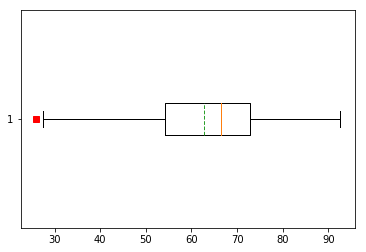

In [187]:
c_array = df1["coverage"].values #convert the dataframe column back into an array so it can be fed into a boxplot function
plt.boxplot(c_array, 0, 'rs', 0, meanline=True, showmeans=True) #plot vaccine in a boxplot coverage to see spread of data over the years 2000 - 2013 

#soucre: https://matplotlib.org/examples/pylab_examples/boxplot_demo.html

The above boxplot is an example of the implementation of the most simple form of the boxplot. We can see that the figure of 25.9 has been determined to be an outlier and has been highlighted here in green. A green dotted line in the box also shows us where the mean of the sample lies. 

Lets compare the spread of coverage for other countries to the Indian data.

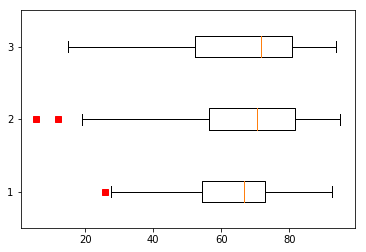

In [188]:
df2 = df.loc[(df['vaccine'] == 'Pol3') & (df['ISO3'] == 'IRQ')] #lets now pull the same data for Iraq and compare
c_array2 = df2["coverage"].values #convert the dataframe column back into an array so it can be fed into a boxplot function
df3 = df.loc[(df['vaccine'] == 'Pol3') & (df['ISO3'] == 'KEN')] #Lets also pull some for Kenya and add it to the overall plot
c_array3 = df3["coverage"].values #convert the dataframe column back into an array so it can be fed into a boxplot function


plt.boxplot([c_array, c_array2, c_array3], 0, 'rs', 0) #plot vaccine in a boxplot coverage to see spread of data over the years 2000 - 2013 

plt.show()

The above box plots now allow us to compare vaccine coverage in Kenya (1), Iraq (2) and India (3) over time, including their median point and itnerquartile range. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c144e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c14d518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c144cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c14dba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c14def0>,
 'means': []}

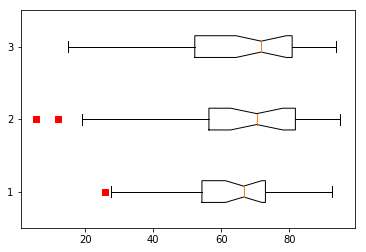

In [189]:
# the next plot we can show is a notched plot
plt.boxplot([c_array, c_array2, c_array3], 1, 'rs', 0) #source: https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

The notch is a very interesting addition to the box as it displays the confidence interval for the median. 


The following diagram<sup>6</sup> demonstrates this relationship: 

<img src='https://i.stack.imgur.com/urPEC.jpg' width="600" height="350">


Changing whisker length and removal of outliers may also be required by the user and can be achieved as follows:

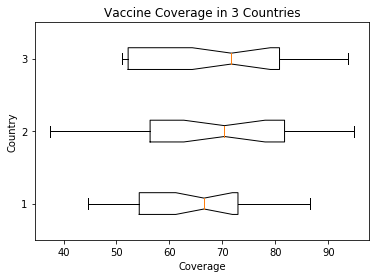

In [190]:
fig, ax1 = plt.subplots() #plot the boxplot as subplots to allow the addition of labels below

bp = plt.boxplot([c_array, c_array2, c_array3], 1, 'rs', 0, whis=0.75, showfliers=False) 
#The critical code here being the "whis=0.75" changing the length of the whiskers to 75% and "showfliers=False" removing the outliers 

ax1.set_title('Vaccine Coverage in 3 Countries') #set titles 
ax1.set_xlabel('Coverage') #set x label
ax1.set_ylabel('Country')#set y label

plt.show()


## 4. Compare the box plot to alternatives

A fundamental challenge with the boxplot is that it does not display density of the data well and therefore could be misleading.


Here I wish to examine alternative plots to the simple boxplot that represents similar data in a different way.


For example in the following dataset, the values are heavily weighted at the extreme ends of the set. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1cbde3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbdea58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cbde278>],
 'medians': [<matplotlib.lines.Line2D at 0x1cbe8128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cbe8470>],
 'means': []}

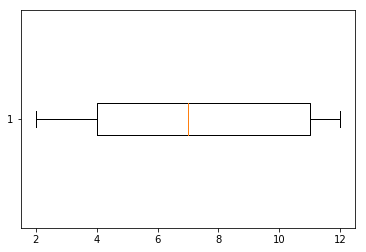

In [191]:
den = [2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 6, 7, 7, 7, 8, 8, 8, 9, 11, 12, 12, 12, 12, 12, 12] #example dataset
plt.boxplot(den, 0, 'rs', 0) #create a boxolot of this data    #Source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

This boxplot looks reasonably distributed but in fact, as wil will see on the next graph, a significant number of values are actually in the "whiskers".


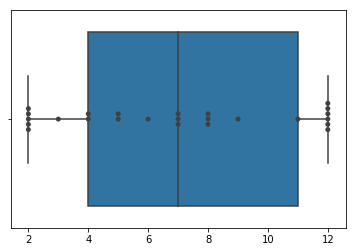

In [192]:
import seaborn as sns #import seaborn functionality

sns.boxplot(den) #use seaborn to create a boxplot similar to the above
sns.swarmplot(den, color=".25") #have seaborn overlay a swarmplot that shows where the data points actually lie #source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In the second plot we can now see that there are a density of data points at the end of each of the whiskers.

I want to take the swarm plot further to use it on the vaccine coverage data to see it this adds to my overall understanding of the set. 

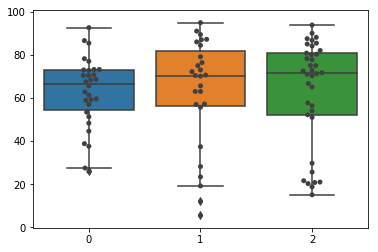

In [193]:
vaccines = [c_array, c_array2, c_array3] #group the vaccine data into a list
sns.boxplot(data=vaccines) #use seaborn to create 3 boxplots from the 3 vaccine data lists
sns.swarmplot(data=vaccines, color=".25") #again I wish to have a swarmplot overlayed on the boxplot. #source: https://seaborn.pydata.org/generated/seaborn.boxplot.html


A BoxenPlot is another variation on the simple boxplot that is intended to show a greater level of detail regarding the data values outside of thise within the InterQuartile Range. The "whisker" are replaced by more boxes representing the size of the population as it extends out towards the maximum and minimum<sup>8</sup>.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


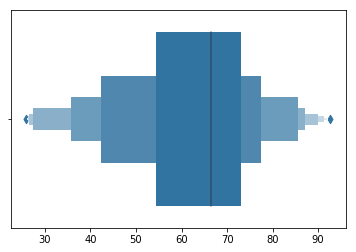

In [194]:
sns.boxenplot(c_array) #create boxen plot using Indian vaccine coverage data #source: https://seaborn.pydata.org/generated/seaborn.boxenplot.html


Building on these plots, the violin plot is a useful and incresingly popular way to show the density of the population. You can see that the square box has been lost as the plot moves towards a shape that reflects This doesn't look  

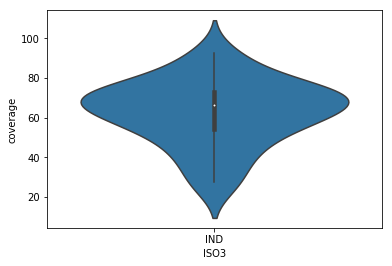

In [195]:
vaccines = [c_array, c_array2, c_array3] #group the vaccine data into a list
sns.violinplot(x='ISO3', y='coverage', data=df1) #source: https://seaborn.pydata.org/generated/seaborn.boxplot.html


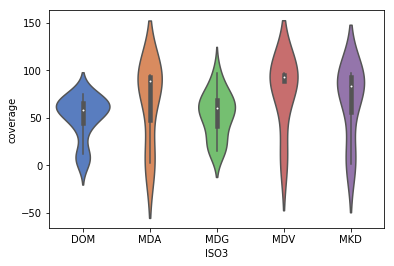

In [197]:
#I want to filter the data to not be overloaded by it in the plot so I use the following to reduce it down somewhat

df = df.loc[(df['vaccine'] == 'Pol3') & (df['cohortYear'] >= 2000) & df['ISO3'].str.contains("D")] #soucre: https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns
# and soucre: https://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string

sns.violinplot(x='ISO3', y="coverage", data=df, palette="muted")

## Conclusion

In conclusion, the boxplot has become a staple resource for staticians across the board. Since the 70's, it has been developed into multiple forms each focusing on additional aspects in relation to confidence intervals of the median and distribution of data, particularly outside of the 50% represented within the box/interquartile range.


Overall, Seaborn appears to have more functionlity with regards to box plots than matplotlib with regards to producing more complex and visually pleasing plots. 


As a result of this project, I am now very confortable employing the boxplot or suitable alternatives for future assignments. 

## References 

1. https://www.khanacademy.org/math/probability/data-distributions-a1/box--whisker-plots-a1/v/constructing-a-box-and-whisker-plot
2. https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm
3. https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/
4. https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
5. https://www.stata-journal.com/sjpdf.html?articlenum=gr0039
6. https://stackoverflow.com/questions/38794406/why-is-matplotlibs-notched-boxplot-folding-back-on-itself
7. https://www.researchgate.net/figure/Box-plot-vs-normal-PDF-By-examining-the-box-plots-key-differences-and-equivalencies_fig5_283569547
8. https://vita.had.co.nz/papers/letter-value-plot.html